### Red neuronal de base radial

Las redes neuronales de base radial (RBF, por sus siglas en inglés, Radial Basis Function) son un tipo de red neuronal artificial que se utiliza en aprendizaje supervisado y no supervisado. Estas redes se llaman "radiales" porque utilizan funciones de base radial como funciones de activación en sus neuronas.

Una descripción básica de cómo funcionan las RBF:

1. Capa de entrada: En esta capa, se introducen los datos de entrada. Cada neurona en esta capa está asociada a una característica específica del conjunto de datos.

2. Capa oculta: Esta es la capa más distintiva de las RBF. Cada neurona en esta capa utiliza una función de base radial como su función de activación. La función de base radial generalmente toma la forma de una campana gaussiana y depende de la distancia entre la entrada y un centro específico asociado a la neurona. Las neuronas en esta capa se utilizan para realizar transformaciones no lineales de los datos de entrada.

3. Capa de salida: En esta capa, se realizan las operaciones de salida, que pueden variar según la tarea que esté realizando la red neuronal. Puede ser una regresión, clasificación u otra tarea, dependiendo de la configuración de la red.

Las redes neuronales de base radial son conocidas por su capacidad para aproximar funciones complejas y resolver problemas de regresión no lineal. Son especialmente útiles en aplicaciones donde la relación entre las características de entrada y la salida es difícil de modelar utilizando métodos lineales.

En el contexto de la ciencia de datos y el aprendizaje automático, las RBF son una técnica útil para abordar problemas que requieren una representación no lineal de los datos, aunque es importante destacar que existen otras arquitecturas de redes neuronales, como las redes neuronales convolucionales (CNN) y las redes neuronales recurrentes (RNN), que se utilizan en diferentes escenarios.

In [83]:
#importar exploracionPerfiles.csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Path: RedNeuronalRadial.ipynb
# Cargar datos
df = pd.read_csv('exploracionPerfiles.csv', sep=',', decimal='.', encoding='utf-8')

In [84]:
df.head(5)

,CorreoElectronico,Edad,Genero,Ubicacion,EstadoCivil,ActividadesCitas,Hobbies,FrecuenciaCitas,Organizacion,FlexibilidadHoraria,...,ActividadesClima,Cocina,RestriccionesAlimentarias,Deportes,InteresesCulturales,EntornoCitas,FormalidadCitas,Vestimenta,Disponibilidad,FlexibilidadHoraria.1
0,mahuitzic65@gmail.com,20,[5],[6],1,"[14, 16, 28, 10, 7]","[11, 21, 10, 30, 29]",[2],3,3,...,[1],"[5, 10]",[2],"[5, 17]","[29, 32, 25, 46, 34, 2, 45, 14, 24, 5, 2, 31, ...",[2],[3],[2],[5],3.0
1,aguilarvaleria004@gmail.com,22,[5],[8],1,"[13, 5, 12, 28, 17]","[5, 22, 13, 16, 8]",[2],4,3,...,[1],"[5, 4, 1]",[1],"[5, 7, 20, 11]","[57, 9, 23, 52, 2, 29, 32, 25, 46, 34, 2, 27, 38]",[2],[2],[3],"[10, 4, 8]",3.0
2,aguilarbjimena@gmail.com,21,[5],[8],1,"[13, 30, 27, 26, 24]","[21, 23, 1, 22, 4]",[2],5,4,...,[1],"[5, 7, 10]",[4],"[5, 20]","[57, 9, 23, 52, 2, 53, 28, 47, 13, 2, 51, 12, ...",[1],[2],[1],[7],4.0
3,dcr26mer@gmail.com,20,[5],[20],1,"[13, 12, 14, 26]","[11, 17, 21, 20, 6]",[2],5,3,...,[1],"[5, 7, 4]",[1],[7],"[57, 9, 23, 52, 2, 53, 28, 47, 13, 2, 31, 26, ...",[2],[3],[1],"[9, 4]",3.0
4,cdenisse618@gmail.com,20,[5],[10],2,"[18, 15, 20, 28, 24, 3]","[17, 14, 21, 4]",[2],3,4,...,[1],"[5, 10]",[1],"[5, 17, 20, 11]",[54],[2],[2],[2],[1],4.0


In [85]:
#eliminar los valores NaN
df = df.dropna()

In [86]:
#separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

y = df['Genero']
X = df.iloc[:, 4:26]


In [87]:
# Realiza one-hot encoding de las características categóricas
X = pd.get_dummies(X, columns=['ActividadesCitas', 'Hobbies', 'FrecuenciaCitas', 'InicioCitas', 'DistanciaAceptable', 'PresupuestoGeneral', 'PresupuestoEspecial', 'DuracionCitas', 'ActividadesClima', 'Cocina', 'RestriccionesAlimentarias', 'Deportes', 'InteresesCulturales', 'EntornoCitas', 'FormalidadCitas', 'Vestimenta', 'Disponibilidad'])


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [89]:
#mostrar todos los tipos de datos de X 
X.dtypes

EstadoCivil                    int64
Organizacion                   int64
FlexibilidadHoraria            int64
ImportanciaClima               int64
FlexibilidadHoraria.1        float64
                              ...   
Disponibilidad_[9, 10, 5]      uint8
Disponibilidad_[9, 4, 8]       uint8
Disponibilidad_[9, 4]          uint8
Disponibilidad_[9, 5, 4]       uint8
Disponibilidad_[9]             uint8
Length: 469, dtype: object

In [90]:
#contar los valores NaN
X.isnull().sum()

EstadoCivil                  0
Organizacion                 0
FlexibilidadHoraria          0
ImportanciaClima             0
FlexibilidadHoraria.1        0
                            ..
Disponibilidad_[9, 10, 5]    0
Disponibilidad_[9, 4, 8]     0
Disponibilidad_[9, 4]        0
Disponibilidad_[9, 5, 4]     0
Disponibilidad_[9]           0
Length: 469, dtype: int64

In [99]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define la capa de entrada
input_layer = Input(shape=(469,))

# Define la capa de salida con una distribución Gaussiana
output_layer = Dense(2)(input_layer)  # Dos salidas para media y desviación estándar

# Crea el modelo
model = Model(inputs=input_layer, outputs=output_layer)

# Compila el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrena el modelo
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Evalúa el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")

Epoch 1/50


2023-10-24 14:58:21.855755: W tensorflow/core/framework/op_kernel.cc:1805] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node 'mean_squared_error/Cast' defined at (most recent call last):
    File "/opt/homebrew/Cellar/python@3.10/3.10.10_1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/homebrew/Cellar/python@3.10/3.10.10_1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/adolfohuerta/Library/Python/3.10/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/homebrew/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/adolfohuerta/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelapp.py", line 724, in start
      self.io_loop.start()
    File "/Users/adolfohuerta/Library/Python/3.10/lib/python/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/opt/homebrew/Cellar/python@3.10/3.10.10_1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/opt/homebrew/Cellar/python@3.10/3.10.10_1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/opt/homebrew/Cellar/python@3.10/3.10.10_1/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/adolfohuerta/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelbase.py", line 512, in dispatch_queue
      await self.process_one()
    File "/Users/adolfohuerta/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelbase.py", line 501, in process_one
      await dispatch(*args)
    File "/Users/adolfohuerta/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelbase.py", line 408, in dispatch_shell
      await result
    File "/Users/adolfohuerta/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelbase.py", line 731, in execute_request
      reply_content = await reply_content
    File "/Users/adolfohuerta/Library/Python/3.10/lib/python/site-packages/ipykernel/ipkernel.py", line 417, in do_execute
      res = shell.run_cell(
    File "/Users/adolfohuerta/Library/Python/3.10/lib/python/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/homebrew/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/opt/homebrew/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/opt/homebrew/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/homebrew/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/homebrew/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/homebrew/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_20779/491043414.py", line 19, in <module>
      model.fit(X_train, y_train, epochs=50, batch_size=10)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "/opt/homebrew/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/homebrew/lib/python3.10/site-packages/keras/src/losses.py", line 1607, in mean_squared_error
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'mean_squared_error/Cast'
Cast string to float is not supported
	 [[{{node mean_squared_error/Cast}}]] [Op:__inference_train_function_1023]

In [92]:
#crear una red neuronal radial con los datos de entrenamiento y prueba con keras 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(26,26,26),max_iter=500)
mlp.fit(X_train,y_train.values.ravel())

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))




[[ 2  0  9]
 [ 0  0  0]
 [ 1  1 15]]
              precision    recall  f1-score   support

         [1]       0.67      0.18      0.29        11
         [3]       0.00      0.00      0.00         0
         [5]       0.62      0.88      0.73        17

    accuracy                           0.61        28
   macro avg       0.43      0.35      0.34        28
weighted avg       0.64      0.61      0.56        28



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


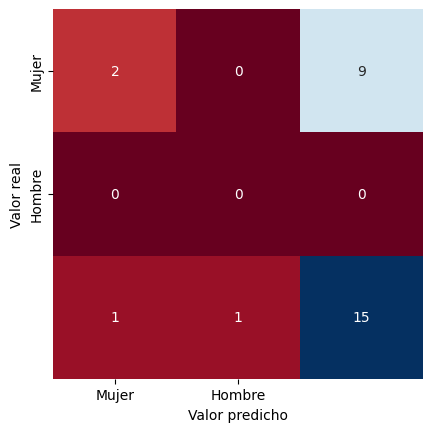

In [95]:
# graficar la matriz de confusión con seaborn
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['Mujer', 'Hombre'], yticklabels=['Mujer', 'Hombre'])
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')
plt.show()